# Machine Learning Techniques for Classification using Iris Dataset and Visualization

## Preprocessing and Initial Exploration

[INFO] loading data...


/Users/rodrigolopezdetoledo/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


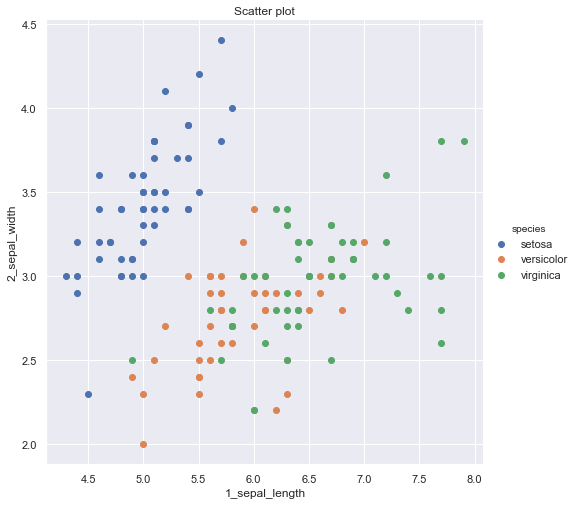

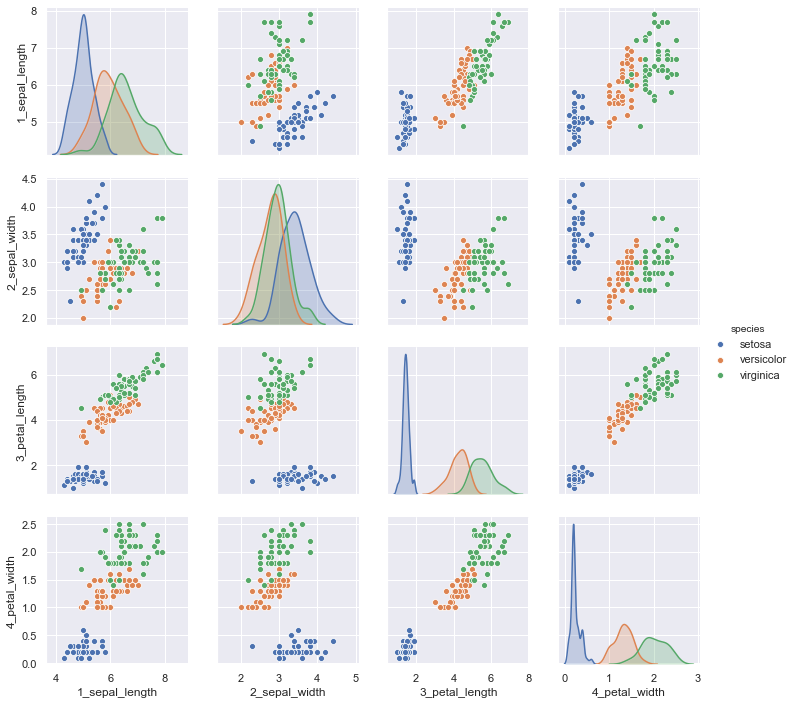

In [84]:
# import the necessary packages
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
import argparse
import seaborn as sns
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.colors as colors
import itertools
from scipy.stats import norm
import scipy.stats

%matplotlib inline
sns.set()

# define the dictionary of models our script can use, where the key
# to the dictionary is the name of the model (supplied via command
# line argument) and the value is the model itself
models = {
	"knn": KNeighborsClassifier(n_neighbors=2, p=2, metric="minkowski"),
	"naive_bayes": GaussianNB(),
	"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
	"svm": SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0),
	"decision_tree": DecisionTreeClassifier(criterion = "gini",
          random_state = 100,max_depth=5, min_samples_leaf=10),
	"random_forest": RandomForestClassifier(n_estimators=100),
	"mlp": MLPClassifier(solver='lbfgs', alpha=1e-5)
}

# load the Iris dataset and perform a training and testing split,
# using 75% of the data for training and 25% for evaluation
print("[INFO] loading data...")

dataset = load_iris()
trainX, testX, trainY, testY = train_test_split(dataset.data,dataset.target, random_state=0, test_size=0.25)

# Lets do some inital exploration of the data using Seaborn
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", size=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

sns.pairplot( data=iris, vars=('1_sepal_length','2_sepal_width','3_petal_length','4_petal_width'), hue='species' )
data.head()

## K-Nearest Neighbors

In [193]:
# Train the model with KNN
print("[INFO] using '{}' model".format(models["knn"]))

X = dataset.data[:, [2, 3]]
y = dataset.target

trainX_knn, testX_knn, trainY_knn, testY_knn = train_test_split(X, y, test_size=.3, random_state=0)

sc = StandardScaler()
sc.fit(trainX_knn)

X_train_std = sc.transform(trainX_knn)
X_test_std = sc.transform(testX_knn)

model = models["knn"]
model.fit(X_train_std, trainY_knn)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = models["knn"].predict(X_test_std)
print(classification_report(testY_knn, predictions,target_names=dataset.target_names))

[INFO] using 'KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')' model
[INFO] evaluating...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.91      0.95        11

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



Populating the interactive namespace from numpy and matplotlib


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


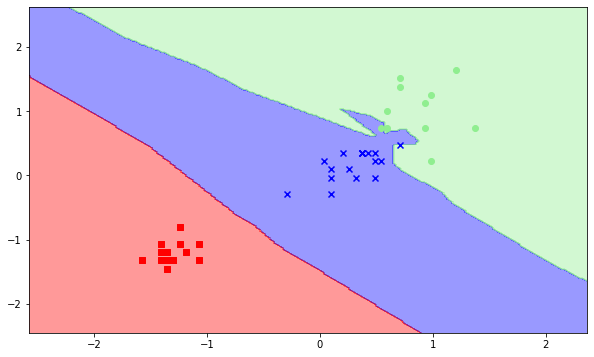

In [194]:
# Visualizing the model
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],c=cmap(idx), marker=markers[idx], label=cl)

plot_decision_regions(X_test_std, testY_knn, model)

## Naive Bayes

In [88]:
#Train the model with Naive Bayes with the dataset
print("[INFO] using '{}' model".format(models["naive_bayes"]))
model = models["naive_bayes"]
#Fit the model applying feature selection
model.fit(trainX[:,:2], trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX[:,:2])
print(classification_report(testY, predictions,
	target_names=dataset.target_names))

[INFO] using 'GaussianNB(priors=None, var_smoothing=1e-09)' model
[INFO] evaluating...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.71      0.75      0.73        16
   virginica       0.50      0.44      0.47         9

    accuracy                           0.76        38
   macro avg       0.74      0.73      0.73        38
weighted avg       0.76      0.76      0.76        38



/Users/rodrigolopezdetoledo/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


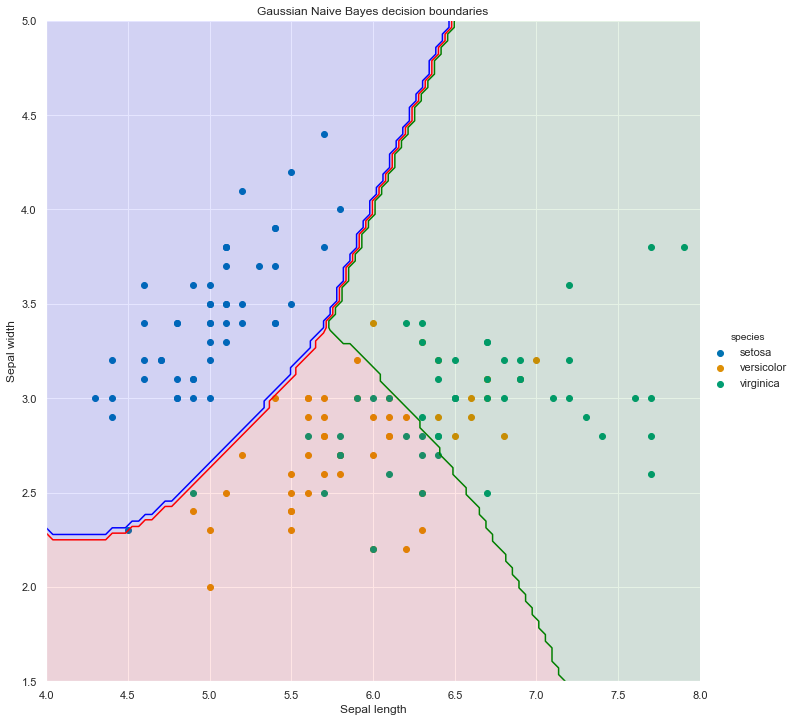

In [14]:
# Visualizing the model
# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array(  [model.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','red','green'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','red','green'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()


## Logistic Regression

In [15]:
# Train the model with Logistic Regression
print("[INFO] using '{}' model".format(models["logit"]))
clf = linear_model.LogisticRegression(solver="lbfgs", multi_class="auto")
clf.fit(trainX[:, :2], trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = clf.predict(testX[:, :2])
print(classification_report(testY, predictions,
	target_names=dataset.target_names))

[INFO] using 'LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)' model
[INFO] evaluating...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.79      0.69      0.73        16
   virginica       0.55      0.67      0.60         9

    accuracy                           0.79        38
   macro avg       0.78      0.78      0.78        38
weighted avg       0.80      0.79      0.79        38



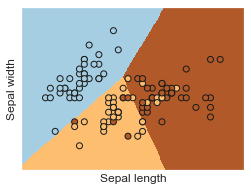

In [19]:
## Visualizing the model
clf.fit(trainX[:, :2], trainY)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = trainX[:, 0].min() - .5, trainX[:, 0].max() + .5
y_min, y_max = trainX[:, 1].min() - .5, trainX[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
predictions = predictions.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(trainX[:, 0], trainX[:, 1], c=trainY, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Support Vector Machines

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Populating the interactive namespace from numpy and matplotlib
[INFO] using 'SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)' model
[INFO] evaluating...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



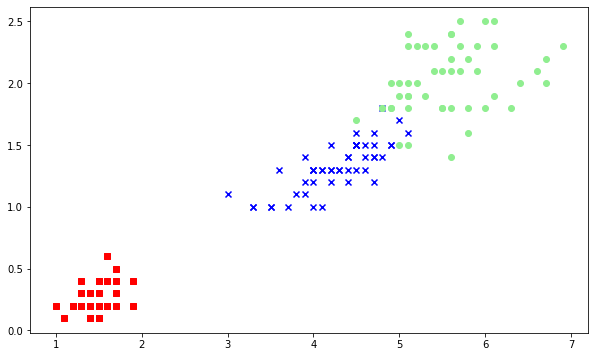

In [169]:
# Train the model with SVM
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

print("[INFO] using '{}' model".format(models["svm"]))

# We'll use the petal length and width only for this analysis
X = dataset.data[:, [2, 3]]
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(testY))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

model = models["svm"]
model.fit(X_train_std, y_train)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test_std)
print(classification_report(y_test, predictions,
	target_names=dataset.target_names))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


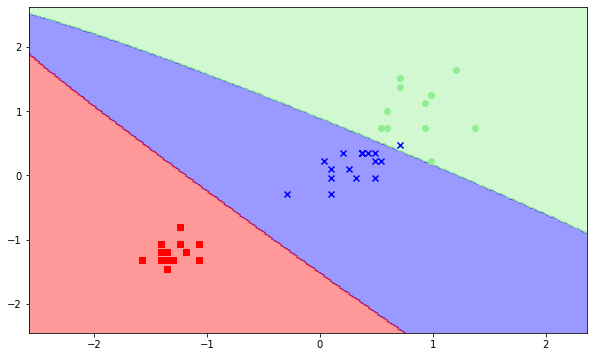

In [174]:
# Visualizing the model
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],c=cmap(idx), marker=markers[idx], label=cl)

plot_decision_regions(X_test_std, y_test, model)

## Decision Trees

In [85]:
# train the model Decision Trees
print("[INFO] using '{}' model".format(models["decision_tree"]))
tree = models["decision_tree"]
tree.fit(trainX, trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = tree.predict(testX)
print(classification_report(testY, predictions,
	target_names=dataset.target_names))


[INFO] using 'DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')' model
[INFO] evaluating...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      0.92      0.92        12
   virginica       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



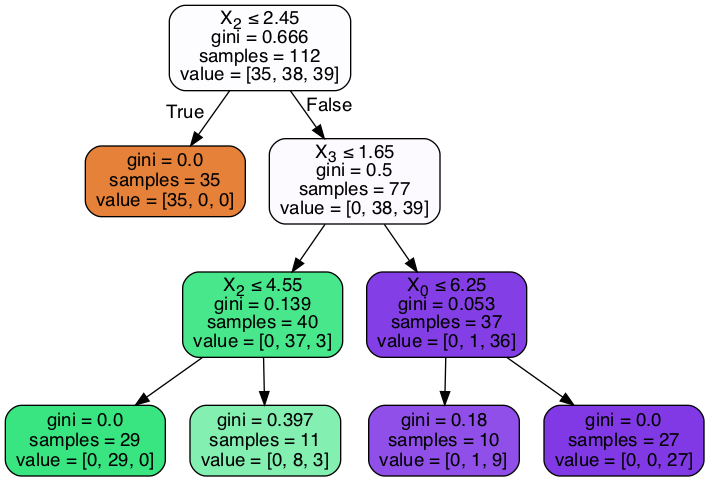

In [86]:
# Visualizing the Model
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest

In [39]:
# Train the model with Random Forest
print("[INFO] using '{}' model".format(models["random_forest"]))
rf = models["random_forest"]
rf.fit(trainX, trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = rf.predict(testX)
print(classification_report(testY, predictions,
	target_names=dataset.target_names))

[INFO] using 'RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)' model
[INFO] evaluating...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



No handles with labels found to put in legend.


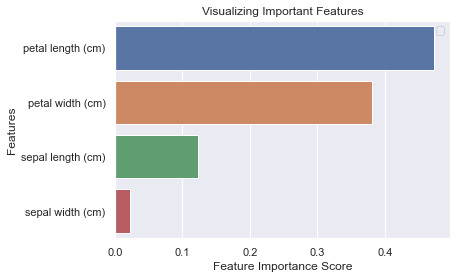

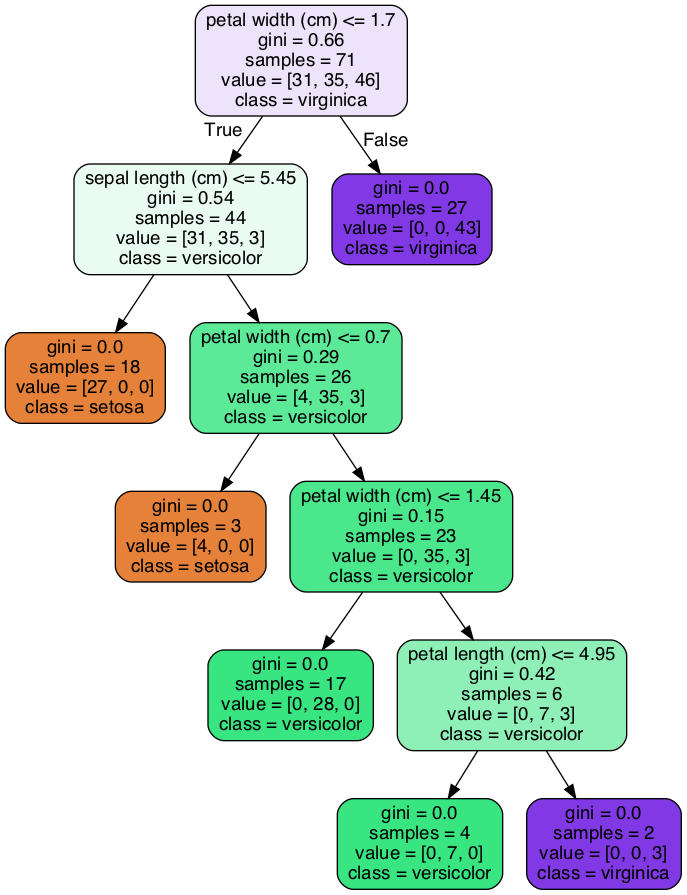

In [52]:
##Visualizing the model 
import six
import pydot
import os

#See feature importance derived from the model, so we can select only 2
feature_imp = pd.Series(rf.feature_importances_,index=dataset.feature_names).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Extract single tree
estimator = rf.estimators_[5]
tree = StringIO()
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file=tree, 
                feature_names = dataset.feature_names,
                class_names = dataset.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

#Image(filename = 'tree.png')
graph = pydotplus.graph_from_dot_data(tree.getvalue())  
Image(graph.create_png())

## Neural Networks - Perceptron

In [85]:
# Train the model with Perceptron
print("[INFO] using '{}' model".format(models["mlp"]))
model = models["mlp"]
model.fit(trainX[:,:2], trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX[:,:2])
print(classification_report(testY, predictions,
	target_names=dataset.target_names))

[INFO] using 'MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)' model
[INFO] evaluating...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.79      0.69      0.73        16
   virginica       0.55      0.67      0.60         9

    accuracy                           0.79        38
   macro avg       0.78      0.78      0.78        38
weighted avg       0.80      0.79      0.79        38



/Users/rodrigolopezdetoledo/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


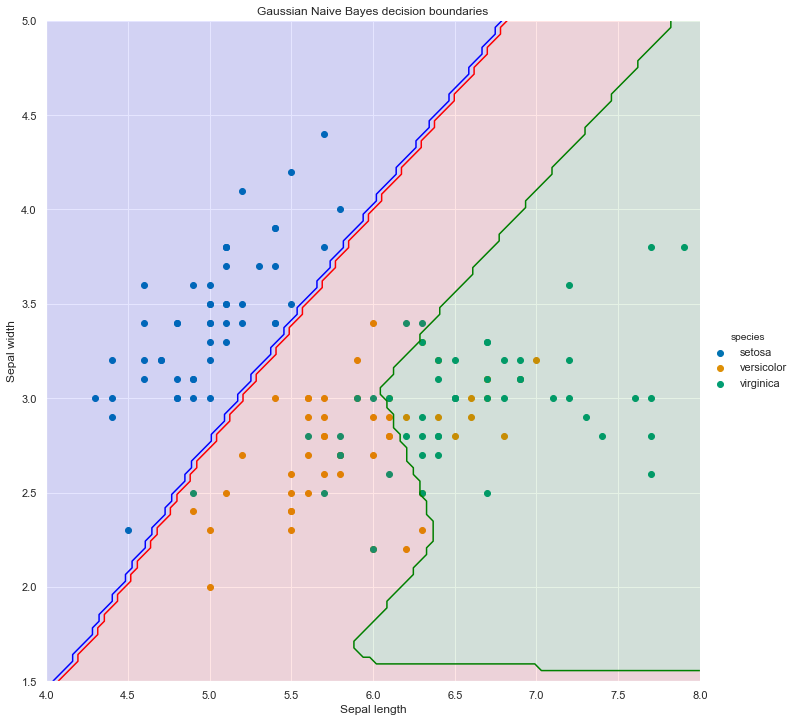

In [86]:
## Visualizing the model

# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array(  [model.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','red','green'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','red','green'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()